### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

In [3]:
!pip install -U tensorflow==2.0 --quiet

     |████████████████████████████████| 86.3MB 119kB/s 
     |████████████████████████████████| 450kB 47.1MB/s 
     |████████████████████████████████| 3.8MB 23.2MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.


In [5]:
tf.__version__

'1.15.0'

### Collect Data

In [6]:
import keras

Using TensorFlow backend.


In [7]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [17]:
print(testY[0:5])

[9 2 1 1 6]


In [18]:
trainX.shape

(60000, 28, 28)

In [19]:
testX.shape

(10000, 28, 28)

In [20]:
testY[0]

9

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

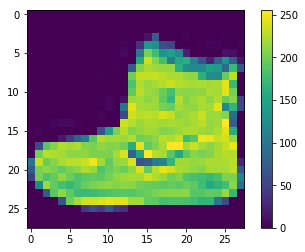

In [42]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
trainX = trainX / 255.0

testX = testX / 255.0

In [44]:
trainY


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

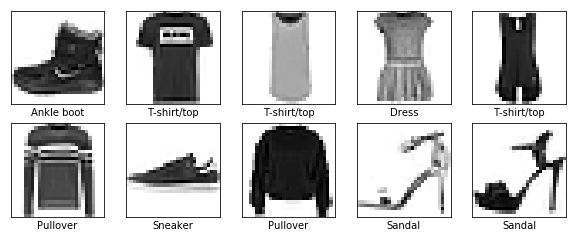

In [46]:
#Lets print the image as well
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

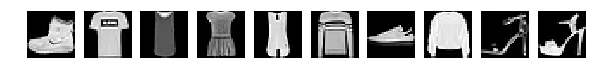

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [12]:
trainX.dtype

dtype('uint8')

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [16]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 113us/sample - loss: 2002.1134 - acc: 0.7413 - val_loss: 1293.4275 - val_acc: 0.7940
Epoch 2/100
60000/60000 [==============================] - 6s 101us/sample - loss: 1587.5383 - acc: 0.7795 - val_loss: 1189.6921 - val_acc: 0.8015
Epoch 3/100
60000/60000 [==============================] - 6s 102us/sample - loss: 1528.2648 - acc: 0.7882 - val_loss: 2199.4974 - val_acc: 0.7608
Epoch 4/100
60000/60000 [==============================] - 6s 101us/sample - loss: 1562.3051 - acc: 0.7875 - val_loss: 1125.1433 - val_acc: 0.8141
Epoch 5/100
60000/60000 [==============================] - 6s 101us/sample - loss: 1484.9815 - acc: 0.7937 - val_loss: 1546.7480 - val_acc: 0.8032
Epoch 6/100
60000/60000 [==============================] - 6s 101us/sample - loss: 1450.9423 - acc: 0.7955 - val_loss: 2090.5576 - val_acc: 0.7750
Epoch 7/100
60000/60000 [==============================] - 6s 101us/

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [22]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 118us/sample - loss: 0.6014 - acc: 0.7923 - val_loss: 0.5113 - val_acc: 0.8233
Epoch 2/100
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4898 - acc: 0.8312 - val_loss: 0.4879 - val_acc: 0.8334
Epoch 3/100
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4699 - acc: 0.8370 - val_loss: 0.4797 - val_acc: 0.8371
Epoch 4/100
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4584 - acc: 0.8409 - val_loss: 0.4862 - val_acc: 0.8368
Epoch 5/100
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4500 - acc: 0.8440 - val_loss: 0.4699 - val_acc: 0.8381
Epoch 6/100
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4412 - acc: 0.8475 - val_loss: 0.4688 - val_acc: 0.8382
Epoch 7/100
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4390 - acc: 0.8474 

### Execute the model

In [0]:
#done above

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [25]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3990 - acc: 0.8596 - val_loss: 0.5103 - val_acc: 0.8387
Epoch 2/100
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3996 - acc: 0.8583 - val_loss: 0.4941 - val_acc: 0.8362
Epoch 3/100
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3997 - acc: 0.8578 - val_loss: 0.4864 - val_acc: 0.8421
Epoch 4/100
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3979 - acc: 0.8605 - val_loss: 0.4836 - val_acc: 0.8396
Epoch 5/100
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3985 - acc: 0.8600 - val_loss: 0.4918 - val_acc: 0.8348
Epoch 6/100
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3993 - acc: 0.8578 - val_loss: 0.4936 - val_acc: 0.8417
Epoch 7/100
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3993 - acc: 0.8587 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())


In [0]:
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [31]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 131us/sample - loss: 1.5473 - acc: 0.6014 - val_loss: 1.0375 - val_acc: 0.7254
Epoch 2/100
60000/60000 [==============================] - 8s 129us/sample - loss: 0.8688 - acc: 0.7369 - val_loss: 0.7354 - val_acc: 0.7500
Epoch 3/100
60000/60000 [==============================] - 8s 125us/sample - loss: 0.6860 - acc: 0.7641 - val_loss: 0.6285 - val_acc: 0.7776
Epoch 4/100
60000/60000 [==============================] - 8s 130us/sample - loss: 0.6072 - acc: 0.7876 - val_loss: 0.5717 - val_acc: 0.7922
Epoch 5/100
60000/60000 [==============================] - 8s 126us/sample - loss: 0.5588 - acc: 0.8044 - val_loss: 0.5342 - val_acc: 0.8084
Epoch 6/100
60000/60000 [==============================] - 8s 128us/sample - loss: 0.5266 - acc: 0.8155 - val_loss: 0.5088 - val_acc: 0.8179
Epoch 7/100
60000/60000 [==============================] - 8s 130us/sample - loss: 0.5024 - acc: 0.8227 

## Review model

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [0]:
model.save('mnist_fashion_v1.h5')

In [34]:
!ls -l

total 392
-rw-r--r-- 1 root root 395320 Nov  5 08:45 mnist_fashion_v1.h5
drwxr-xr-x 1 root root   4096 Oct 25 16:58 sample_data


In [35]:
model = tf.keras.models.load_model('mnist_fashion_v1.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [37]:
model.input

<tf.Tensor 'reshape_2_input_1:0' shape=(?, 28, 28) dtype=float32>

In [38]:
testX[0:5].shape

(5, 28, 28)

In [0]:
import numpy as np

In [40]:
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

In [42]:
pred = model.predict(input_data)
#pred
print(pred)

[[1.2870645e-05 3.0628680e-06 6.5266853e-05 9.3979332e-05 3.2867600e-05
  1.3424925e-03 5.7134149e-04 1.0755649e-02 1.6148557e-04 9.8696089e-01]]
